<a href="https://colab.research.google.com/github/snmsndhu/deep_learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(datetime.datetime.now())

2.15.0
2024-02-26 16:05:58.541647


## Creating date to view and fit

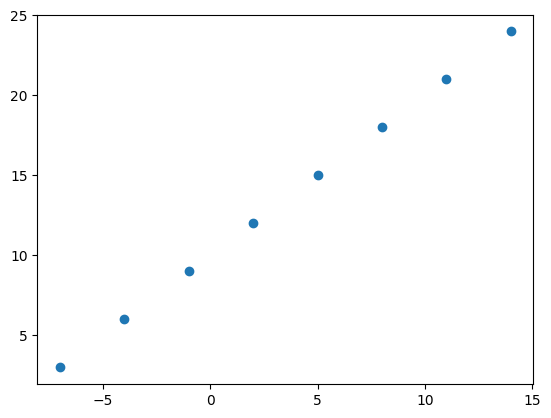

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_ = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y_ = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


plt.scatter(X_, y_);

In [3]:
# Lets create the data using the tensorflow

house_info = tf.constant(["bedroom", "batroom", "garage"])
house_price = tf.constant([9384422])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'batroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9384422], dtype=int32)>)

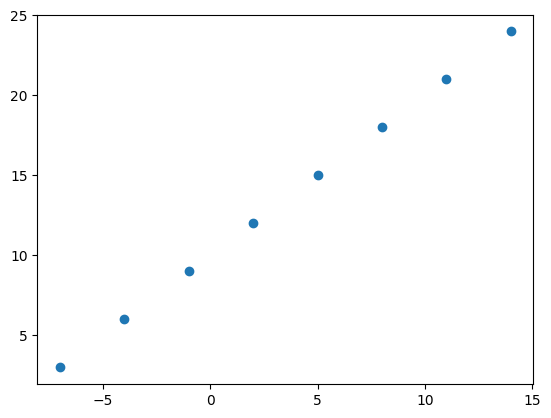

In [4]:
# Create features but this time using with the tensorflow

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y);

In [5]:
# Lets check the shape of the input and output

input_shape = X[0].shape

output_shape = y[0].shape


input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [6]:
# Lets train out model

# Set random seed

tf.random.set_seed(42)

# Create a model using the sequentail API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 14.0743 - mae: 14.0743
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 13.9418 - mae: 13.9418
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 13.8093 - mae: 13.8093
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 13.6768 - mae: 13.6768
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 13.5443 - mae: 13.5443


In [7]:
# Make a prediction with the model

model.predict([17.0])

1/1 [==============================] - 0s 123ms/step


array([[0.23570433]], dtype=float32)

In [8]:
# Lets improve our model performance

# Train the model longer

# Set the random seed

tf.random.set_seed(42)

# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile mode (same as above)

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)



Epoch 1/100
1/1 [==============================] - 1s 645ms/step - loss: 13.6880 - mae: 13.6880
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 13.5555 - mae: 13.5555
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 13.4230 - mae: 13.4230
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2905 - mae: 13.2905
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 13.1580 - mae: 13.1580
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 13.0255 - mae: 13.0255
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 12.8930 - mae: 12.8930
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7605 - mae: 12.7605
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 12.6280 - mae: 12.6280
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 12.4955 - mae: 12.4955
Epoch 11/100
1/1 [==============================

In [9]:
# Lets predict again

model.predict([17.0])

1/1 [==============================] - 0s 161ms/step


array([[29.71171]], dtype=float32)

In [10]:
# Make a bigger dataset

X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [11]:
# Make labels

y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [12]:
# Split the data into the training and test set
len(X)

50

In [13]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

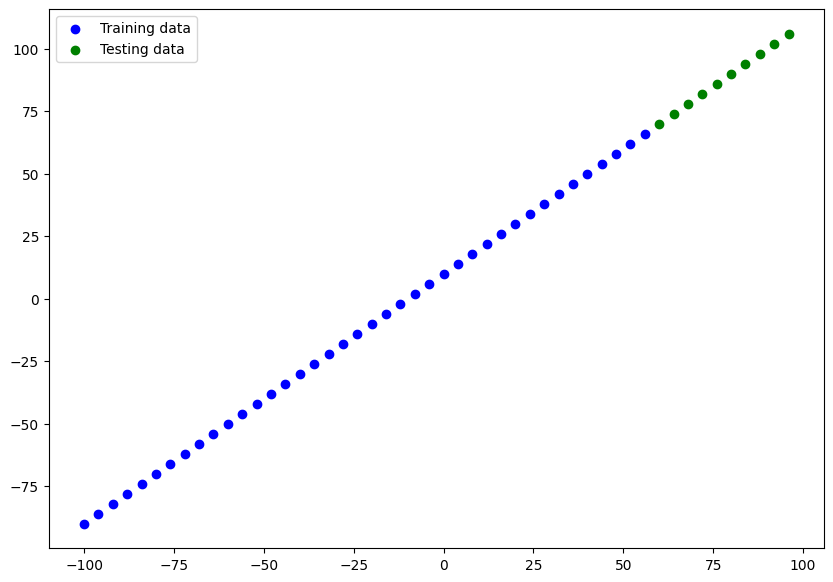

In [14]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "b", label = 'Training data')
plt.scatter(X_test, y_test, c = "g", label = "Testing data")
plt.legend();

In [15]:
 # Let's train a model

 # Set the random seed

tf.random.set_seed(42)

 # Create a model

model = tf.keras.Sequential([
     tf.keras.layers.Dense(1, input_shape=[1])
 ])

 # Compare model
model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [18]:
model.summary(
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Make the predictions

y_preds = model.predict(X_test)

1/1 [==============================] - 0s 38ms/step


In [20]:
y_preds

array([[ 74.39772 ],
       [ 79.27199 ],
       [ 84.146255],
       [ 89.020515],
       [ 93.89478 ],
       [ 98.76904 ],
       [103.64331 ],
       [108.51758 ],
       [113.39184 ],
       [118.266106]], dtype=float32)

In [21]:


def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


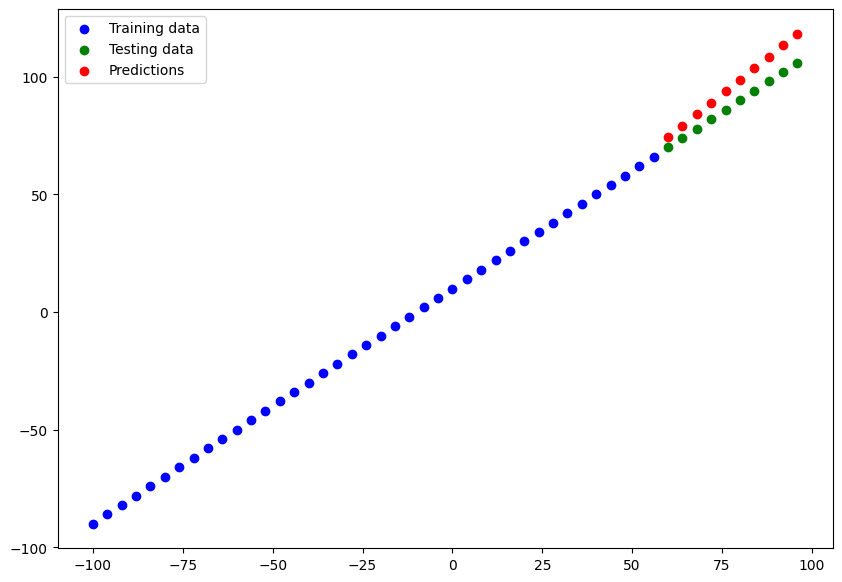

In [22]:

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)


In [23]:
# Evaluate the model on the test sets

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 128ms/step - loss: 8.3319 - mae: 8.3319


[8.331913948059082, 8.331913948059082]

In [24]:
# Shape before the squeeze
y_preds.shape

(10, 1)

In [25]:
y_preds.squeeze().shape

(10,)

In [26]:
# calculate the MAE

mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.331914>

In [27]:
# calculate the MSE
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=75.72658>

In [28]:
#  We can also calculate the MAE using the pure TensorFlow functions

# Returns the same as tf.metrics.mean_absolute_error()

tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=8.33191375732422>

In [29]:
# Let make a functions for our evaluation metrics

def mae(y_test, y_pred):

  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):

  return tf.metrics.mean_squared_error(y_test, y_pred)

In [30]:
# We will make 3 different models to run a experiments to improve our models

In [31]:
# Model 1

# Set the random seed

tf.random.set_seed(42)

# Original model without modifications

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit the model

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 10.3648 - mae: 10.3648
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5580 - mae: 8.5580
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 13.7356 - mae: 13.7356
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5499 - mae: 7.5499
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0638 - mae: 12.0638
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3313 - mae: 9.3313
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4870 - mae: 8.4870
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0331 - mae: 9.0331
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5510 - mae: 18.5510
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9996 - mae: 9.9996
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss

1/1 [==============================] - 0s 56ms/step


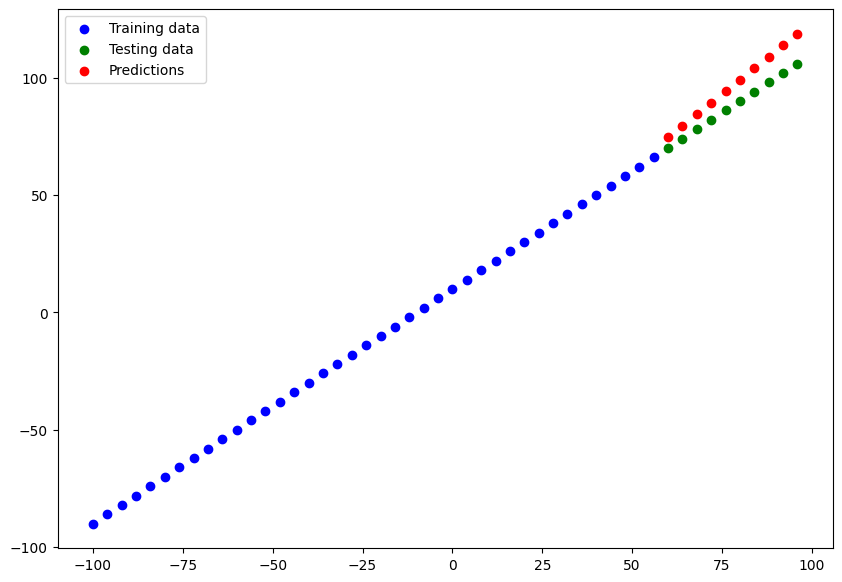

In [32]:
# Make and plot the predications for the model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [33]:
# calculate the MAE and MSE

mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()

mae_1, mse_1

(8.655833, 81.45326)

In [34]:
# Build the model_2

In [35]:
# Set the random seed

tf.random.set_seed(42)

# Model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # Adding a second layer in this model to check th performance
])

# Compile the model

model_2.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ["mae"])

# Fit the model

model_2.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs = 100, verbose = 0)

1/1 [==============================] - 0s 47ms/step


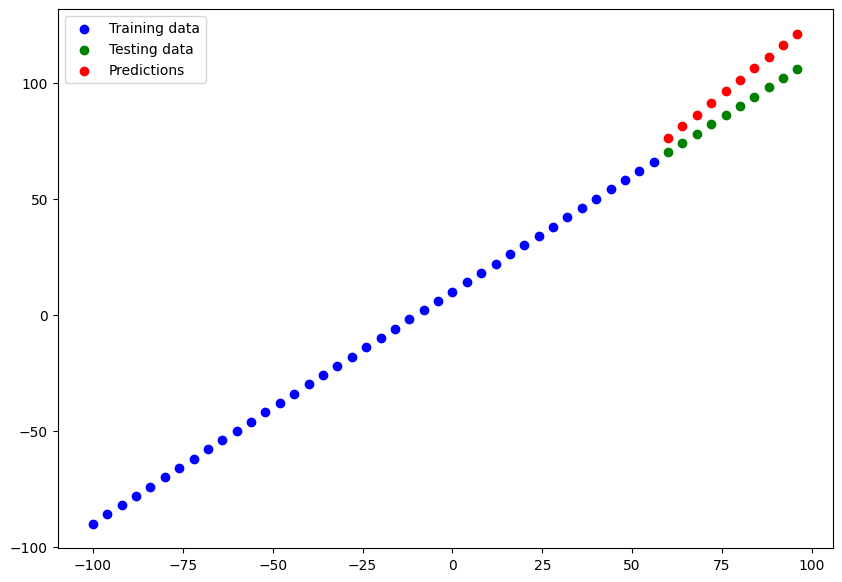

In [36]:
# Make and plot preditions for model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [37]:
# calculate the mae and mse

mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()

mae_2, mse_2

(10.661443, 121.45835)

In [38]:
# Build a model_3


In [39]:
# Random seed

tf.random.set_seed(42)

# Model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit

model_3.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 500, verbose = 0)

1/1 [==============================] - 0s 51ms/step


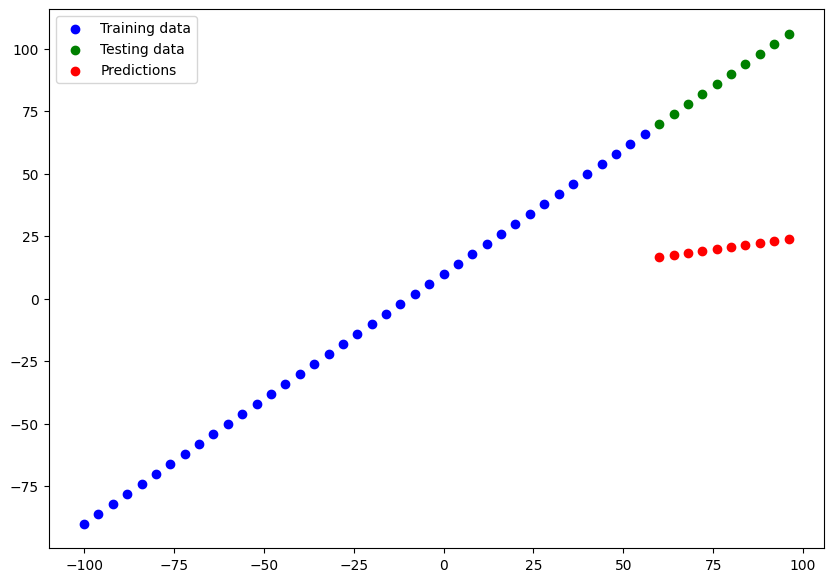

In [40]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions= y_preds_3);

In [41]:
# calculate model 3 metrics

mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()

mae_3 , mse_3

(67.60429, 4654.3843)

In [42]:
# lets compare the results of all 3 models

In [43]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [44]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.655833,81.453262
1,model_2,10.661443,121.458351
2,model_3,67.604286,4654.384277


In [45]:
# Save a model using the SaveModel format
model_2.save("best_model_SaveModel_format")

In [46]:
# Loading a model
loaded_saved_model = tf.keras.models.load_model("best_model_SaveModel_format")
loaded_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Downloading a model from google colab

# from google.colab import files
# files.download("best_model_SaveModel_format")

In [48]:
# Lets work with the large example

In [49]:
# Import all the required lib
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
# Read in the data

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [51]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
# converting the data into the numbers.
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [53]:
# Lets split the data

X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [54]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 0.2,
                                                    random_state = 42)

In [57]:
# Lets build a model


# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 9354.8516 - mae: 9354.8516
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7874.4692 - mae: 7874.4692
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7543.9141 - mae: 7543.9141
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7680.0020 - mae: 7680.0020
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.1089 - mae: 7748.1089
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7623.3584 - mae: 7623.3584
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7552.8003 - mae: 7552.8003
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7690.9893 - mae: 7690.9893
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7489.8882 - mae: 7489.8882
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7696.3081 - mae: 7696.3081

In [58]:
# Check the result of the insurance model

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7773.4634 - mae: 7773.4634


[7773.46337890625, 7773.46337890625]

In [60]:
# Lets try to improve the result of the model

# Random seed

tf.random.set_seed(42)

#model

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# Compile

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

history = insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [61]:
# Evaluate it

insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4849.4810 - mae: 4849.4810


[4849.48095703125, 4849.48095703125]